In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

from keras.datasets import mnist
from keras.models import Sequential

from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [3]:
(X_train, y_train),(X_test,y_test) = mnist.load_data()



In [4]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


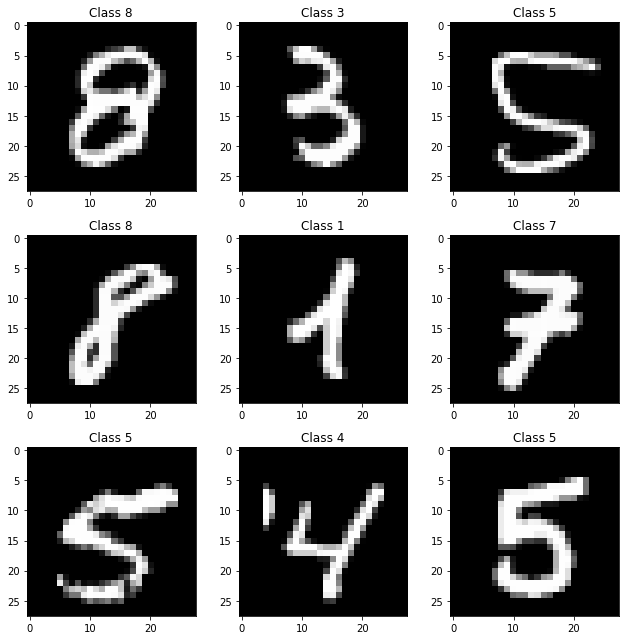

In [5]:
plt.rcParams['figure.figsize']=(9,9)

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation = 'none')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

In [6]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str (col_maxes[i])+fmt+"}").format(y), end=" ")
        print("")
        
matprint(X_train[num])

0 0 0 0 0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 0 0 0 0 0 
0 0 0 0 0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 0 0 0 0 0 
0 0 0 0 0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 0 0 0 0 0 
0 0 0 0 0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 0 0 0 0 0 
0 0 0 0 0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 0 0 0 0 0 
0 0 0 0 0 0 0   0   0   0   0   0   0   0   0   0   0   0  20 125 205 254 111 0 0 0 0 0 
0 0 0 0 0 0 0   0   0   0   0   0   0  95 118 148 248 248 249 253 253 253 110 0 0 0 0 0 
0 0 0 0 0 0 0   0  46 229 241 241 241 251 253 253 253 253 253 253 253 253 110 0 0 0 0 0 
0 0 0 0 0 0 0   0 105 253 253 253 253 253 253 253 253 234 149 149 135  19   8 0 0 0 0 0 
0 0 0 0 0 0 0   0 222 253 253 253 172 155 122  25  25  21   0   0   0   0   0 0 0 0 0 0 
0 0 0 0 0 0 0   0 235 253 253 132   6   0   0   0   0   0   0   0   0   0   0 0 0 0 0 0 
0 0 0 0 0 0 0   0 235

In [7]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [8]:
nb_classes = 10

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [9]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [10]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization

In [11]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [12]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [13]:
nb_classes =10

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [14]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(BatchNormalization(axis=-1))
convLayer01 = Activation('relu')
model.add(convLayer01)

model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
convLayer02 = MaxPooling2D(pool_size=(2,2))
model.add(convLayer02)

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization(axis=-1))
convLayer03 = (Activation('relu'))
model.add(convLayer03)

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
convLayer04 = MaxPooling2D(pool_size=(2,2))
model.add(convLayer04)
model.add(Flatten())

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 24, 24, 32)        0

In [16]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [17]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08,shear_range=0.3,
                        height_shift_range=0.08, zoom_range=0.08)
test_gen = ImageDataGenerator()

In [18]:
train_generator = gen.flow(X_train, Y_train, batch_size=128)
test_generator = test_gen.flow(X_test,Y_test, batch_size=128)

In [19]:
model.fit_generator(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1,
                   validation_data=test_generator, validation_steps=10000//128)

C:\Users\lborb\AppData\Local\Temp\ipykernel_6120\2932155566.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1,


Epoch 1/5
468/468 [==============================] - 181s 380ms/step - loss: 0.1302 - accuracy: 0.9602 - val_loss: 0.1335 - val_accuracy: 0.9587
Epoch 2/5
468/468 [==============================] - 190s 406ms/step - loss: 0.0488 - accuracy: 0.9845 - val_loss: 0.0452 - val_accuracy: 0.9860
Epoch 3/5
468/468 [==============================] - 222s 474ms/step - loss: 0.0399 - accuracy: 0.9873 - val_loss: 0.0621 - val_accuracy: 0.9817
Epoch 4/5
468/468 [==============================] - 198s 423ms/step - loss: 0.0321 - accuracy: 0.9899 - val_loss: 0.0362 - val_accuracy: 0.9892
Epoch 5/5
468/468 [==============================] - 217s 464ms/step - loss: 0.0310 - accuracy: 0.9904 - val_loss: 0.0353 - val_accuracy: 0.9895


In [28]:
score = model.evaluate(X_test, Y_test)
print('Test score: ', score[0])
print('Test accuracy: ', score[1])

313/313 [==============================] - 9s 29ms/step - loss: 0.0353 - accuracy: 0.9895
Test score:  0.03527300804853439
Test accuracy:  0.9894999861717224


In [30]:
from keras import backend as K

img = X_test[3]
img = np.expand_dims(img, axis=0) 


def visualize(layer):
  inputs = [K.learning_phase()] + model.inputs

  _convout1_f = K.function(inputs, [layer.output])

def convout1_f(X):

  return _convout1_f([0] + [X])

  convolutions = convout1_f(img)
  convolutions = np.squeeze(convolutions)

  print ('Shape of conv:', convolutions.shape)

  m = convolutions.shape[2]
  n = int(np.ceil(np.sqrt(m)))

  fig = plt.figure(figsize=(15,12))
  for i in range(m):
    ax = fig.add_subplot(n,n,i+1)
    ax.imshow(convolutions[:,:,i], cmap='gray')

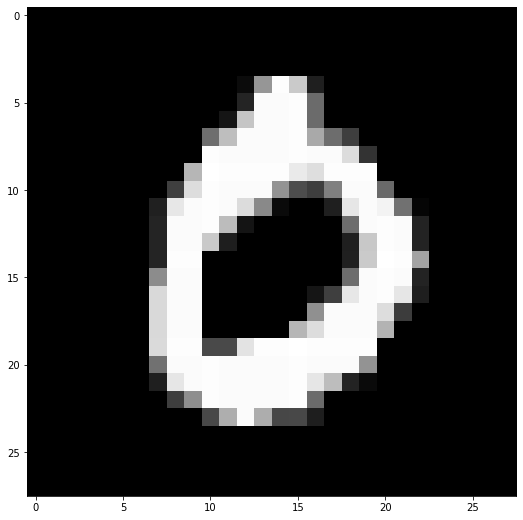

In [31]:
plt.figure()
plt.imshow(X_test[3].reshape(28,28), cmap='gray', interpolation='none')